# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 로지스틱 회귀분석은 cutoff 설정 값에 따라 classification의 성능이 달라집니다.      
   해당 데이터셋에 걸맞는 cutoff value를 찾아보고, 이를 기반으로 예측을 진행해 성능을 평가해 주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("assignment3_creditcard.csv")

In [3]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [5]:
data['Class'].value_counts()

0    28432
1      246
Name: Class, dtype: int64

## 1. Logistic Regression 

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',axis=1), data['Class'], random_state = 0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21508, 28), (7170, 28), (21508,), (7170,))

In [9]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\LG\venv\jbeen\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# class 예측
y_pred = classifier.predict(X_test) 

In [11]:
# mean accuracy 
classifier.score(X_test, y_test)

0.997907949790795

## 2. Metrics Evaluation 

### 1) sklearn 패키지를 이용한 성능 평가지표 계산 

In [12]:
from sklearn.metrics import *

In [13]:
# f1 score
f1_score(y_pred, y_test) 

0.845360824742268

In [15]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7125
           1       0.79      0.91      0.85        45

   micro avg       1.00      1.00      1.00      7170
   macro avg       0.89      0.95      0.92      7170
weighted avg       1.00      1.00      1.00      7170



### 2) confusion matrix를 이용한 성능 평가지표 계산 

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[1, 0])

array([[  41,   11],
       [   4, 7114]], dtype=int64)

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(7114, 4, 11, 41)

* TP (실제=1, 예측=1): 41
* FN (실제=1, 예측=0): 11
* FP (실제=0, 예측=1): 4
* TN (실제=0, 예측=0): 7114

<br>


데이터를 보았을 때 사기인 경우(Y=1) 보다 사기가 아닌 경우(Y=0)가 훨씬 많다. 

분류 모형을 학습시키면 Y=0일 때를 더 많이 학습하게 되므로 실제 데이터와 무관하게 Y=0이라고 예측할 확률이 커진다. 따라서 TN의 값이 매우 높지만, TP 값이 작은 것을 알 수 있다. 

accuracy는 TN, TP 값을 한꺼번에 고려하므로 TN은 높지만 TP값이 낮은 경우는 고려하지 못하게 된다. 

In [18]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.997907949790795


confusion matrix의 accuracy 값과 mean accuracy 값은 동일하다.

In [19]:
precision = tp / (fp+tp)
recall = tp / (fn+tp)
specificity = tn / (fp+tn)
f1_score = 2*(precision*recall)/(precision+recall)

In [20]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.9111111111111111
recall:  0.7884615384615384
specificity:  0.9994380443944928
f1_score:  0.845360824742268


### 3) cut-off value 찾아보기 
* fpr = fall-out = 1-specificity
* tpr = sensitivity

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.40488901e-04,
        1.40488901e-04, 2.80977803e-04, 2.80977803e-04, 4.21466704e-04,
        4.21466704e-04, 5.61955606e-04, 5.61955606e-04, 7.02444507e-04,
        7.02444507e-04, 8.42933408e-04, 8.42933408e-04, 1.12391121e-03,
        1.12391121e-03, 1.40488901e-03, 1.40488901e-03, 5.61955606e-03,
        5.90053386e-03, 1.72801349e-02, 1.72801349e-02, 2.96431582e-02,
        2.96431582e-02, 2.02163529e-01, 2.02444507e-01, 2.06659174e-01,
        2.06940152e-01, 2.98679404e-01, 2.99100871e-01, 3.65130655e-01,
        3.65411632e-01, 5.00280978e-01, 5.00561956e-01, 5.83169430e-01,
        5.83590896e-01, 6.40769879e-01, 6.41050857e-01, 7.10311885e-01,
        7.10592863e-01, 8.34223096e-01, 8.34504074e-01, 9.05731947e-01,
        9.06012925e-01, 9.89744310e-01, 9.90025288e-01, 1.00000000e+00]),
 array([0.        , 0.01923077, 0.53846154, 0.53846154, 0.57692308,
        0.57692308, 0.75      , 0.75      , 0.78846154, 0.78846154

* 인수
    * 타겟 y 벡터, 판별함수 벡터 
    
    
* 결과
    * 변화되는 기준값 (thresholds)
    * 그 기준값을 사용했을 때의 재현율 (tpr = sensitivity) 
      - 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율 (Y(Actual)=1 | Y(Predicted)=1)
      - true positive rate, 높을수록 좋은 모형 
    * 위양성률 (fpr = fall-out = 1-specificity)
      - 실제로는 정상 거래인데, 사기 거래라고 예측한 거래의 비율 (Y(Predicted)=1 | Y(Actual) = 0)
      - false positive rate, 낮을수록 좋은 모형 

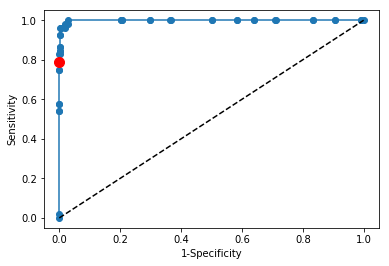

In [23]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [24]:
# roc curve 아래의 면적 
roc_auc = auc(fpr, tpr)
roc_auc 

0.9988571768214927

AUC 값은 1에 가까울수록 성능이 좋다는 것을 뜻하므로, 모델의 성능이 매우 좋다고 생각할 수 있다.

## 3. 새로운 cutoff value로 모델 예측하기 

In [25]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

In [28]:
optimal_threshold # 새롭게 예측한 최적 cutoff value 

0.010908942758828376

In [27]:
# 판별함수 값이 optimal_threshold 보다 크면 1, 작으면 0으로 분류 
predict_new = np.where(classifier.predict_proba(X_test) > optimal_threshold, 1, 0)

In [29]:
# 새로운 cutoff value로 분류한 confusion matrix 
confusion_matrix(y_test, predict_new[:, 1], labels=[1, 0])

array([[  51,    1],
       [ 211, 6907]], dtype=int64)

In [30]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_new[:, 1]).ravel()
(tn, fp, fn, tp)

(6907, 211, 1, 51)

* TP (실제=1, 예측=1): 51
* FN (실제=1, 예측=0): 1
* FP (실제=0, 예측=1): 211
* TN (실제=0, 예측=0): 6907

In [31]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy: ", accuracy)

accuracy:  0.9704323570432357


In [32]:
precision = tp / (fp+tp)
recall = tp / (fn+tp)
specificity = tn / (fp+tn)
f1_score = 2*(precision*recall)/(precision+recall)

In [33]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.1946564885496183
recall:  0.9807692307692307
specificity:  0.970356841809497
f1_score:  0.3248407643312102


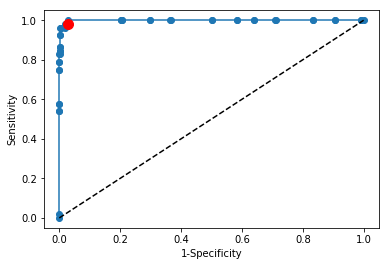

In [34]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### Q. cutoff value를 바꿔서 나온 결과의 의의는 무엇일까요 ? 

<cutoff value 를 바꿔서 나온 결과> 
* TP (실제=1, 예측=1): 41 -> 51
* FN (실제=1, 예측=0): 11 -> 1
* FP (실제=0, 예측=1): 4 -> 211
* TN (실제=0, 예측=0): 7114 -> 6907


.


<cutoff value를 바꿔서 나온 결과의 의의>           
이전 모델보다 accuracy 같은 평가지표 값은 매우 낮아졌지만 TP 값이 증가하고, FN값이 감소한 것에서 의의를 찾을 수 있습니다.
- 사기 탐지 모델의 경우, 사기가 발생했을 때 제대로 캐치하는 것이 중요합니다. (= TP)
- FDS(이상거래탐지시스템)은 카드 부정사용 및 이상징후를 실시간 탐지하여, 이상거래를 신속하게 대응하는 것을 주 목적으로 합니다.           
  따라서 실제 사기 행위를 제대로 적발하지 못하는 것이 가장 위험한 행동이 될 수 있습니다. (=FN)
- FDS에서 정상, 비정상 정보의 불균형(비정상 행위 정보(Y=1)의 양이 매우 부족) 문제는 사기를 적발하는 데에 어려움을 주고 있습니다. (Y=0에 치우쳐져서 학습)         
  -> 우리는 이러한 점을 고려해 cutoff를 조정함으로써 재분류 해 보는 과정을 수행한 것입니다 !
- FP의 값은 늘어났지만, 이는 철저하게 사기를 예방하는 차원에서 한 번 더 점검한다는 생각으로 본다면 좋을 것 같습니다.


( 즉, 해당 데이터셋에서는 recall 값이 중요한 성능 평가지표로 작용합니다 ! )